### Downloading Images from google

In [1]:
!pip install google_images_download

    100% |████████████████████████████████| 911kB 19.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/d2/23/84/3cec6d566b88bef64ad727a7e805f6544b8af4a8f121f9691c
Successfully built google-images-download


In [0]:
from google.colab import drive
drive.mount('./gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ./gdrive


In [2]:
cd ./gdrive/My Drive/Colab Notebooks

/content/gdrive/My Drive/Colab Notebooks


In [0]:
!googleimagesdownload --keywords "shirt,pant,blazer,top,dress" 

In [0]:
cd ..

/content/gdrive/My Drive/Colab Notebooks


### Preprocessing image data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train_path = "./downloads/"

In [7]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
classes = ['shirt', 'pant', 'top', 'dress', 'blazer']

In [38]:
train_batches = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_generator=train_batches.flow_from_directory(train_path, 
                                                         target_size=(224,224,),
                                                         classes=classes,
                                                         batch_size=20,
                                                  subset='training')

valid_generator=train_batches.flow_from_directory(train_path, 
                                                         target_size=(224,224,),
                                                         classes=classes,
                                                         batch_size=20,
                                                  subset='validation')                                   

Found 432 images belonging to 5 classes.
Found 106 images belonging to 5 classes.


In [0]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [0]:
imgs, labels = next(train_generator)

In [17]:
labels

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [0]:
dict_class = train_generator.class_indices

In [0]:
dict_class = dict((v,k) for k,v in dict_class.items())

In [21]:
dict_class

{0: 'shirt', 1: 'pant', 2: 'top', 3: 'dress', 4: 'blazer'}

In [16]:
np.argmax(labels[3])

3

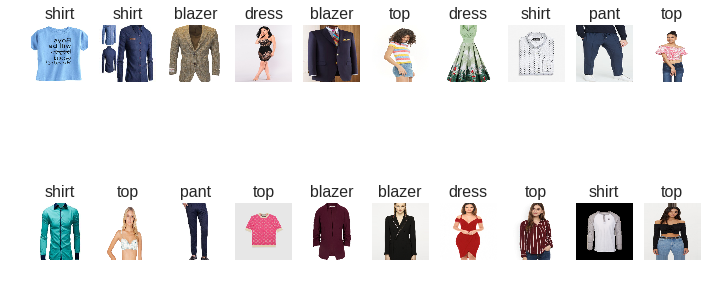

In [24]:
#test_imgs, test_labels = next(valid_generator)
plots(imgs*255, rows=2, titles=[dict_class[np.argmax(l)] for l in labels  ])

### Building and training simple CNN

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [0]:
input_shape=(224,224,3)
num_classes=5

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.fit_generator(train_generator,
                   steps_per_epoch=20,
                    epochs=10,
                    validation_steps=1,
                   verbose=2,
                    validation_data=valid_generator)

Epoch 1/10
 - 16s - loss: 8.2478 - acc: 0.4883 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 2/10
 - 11s - loss: 7.9168 - acc: 0.5088 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 3/10
 - 13s - loss: 8.3625 - acc: 0.4812 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/10
 - 12s - loss: 7.8807 - acc: 0.5111 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/10
 - 11s - loss: 8.0060 - acc: 0.5033 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 6/10
 - 13s - loss: 8.1842 - acc: 0.4922 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 7/10
 - 12s - loss: 7.8618 - acc: 0.5122 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/10
 - 12s - loss: 8.3816 - acc: 0.4800 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 9/10
 - 12s - loss: 8.1842 - acc: 0.4922 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 10/10
 - 13s - loss: 7.9974 - acc: 0.5038 - val_loss: 4.8354 - val_acc: 0.7000


In [0]:
##model.save('./models/sushi.h5')  size is 1GB

## Using Pretrained VGG16 Model

### Fine tuning VGG16 model

In [28]:
vgg16_model = keras.applications.vgg16.VGG16()

Instructions for updating:
Colocations handled automatically by placer.


In [29]:
type(vgg16_model) ## its Model we need Sequential model

keras.engine.training.Model

In [0]:
from keras.layers import InputLayer

In [0]:
model = Sequential()
model.add(InputLayer(input_shape=input_shape))
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

In [0]:
model.summary()

In [0]:
for layer in model.layers:
  layer.trainable = False

In [0]:
model.add(Dense(5, activation='softmax'))

In [0]:
model.summary()

### Train the vgg16

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [40]:
model.fit_generator(train_generator,
                   steps_per_epoch=40,
                    epochs=20,
                    validation_steps=4,
                   verbose=2,
                    validation_data=valid_generator)

Epoch 1/20
 - 32s - loss: 0.6322 - acc: 0.7758 - val_loss: 0.7117 - val_acc: 0.7727
Epoch 2/20
 - 28s - loss: 0.6501 - acc: 0.7630 - val_loss: 0.7088 - val_acc: 0.6500
Epoch 3/20
 - 29s - loss: 0.6575 - acc: 0.7605 - val_loss: 0.4108 - val_acc: 0.8636
Epoch 4/20
 - 28s - loss: 0.5484 - acc: 0.8050 - val_loss: 0.5258 - val_acc: 0.8333
Epoch 5/20
 - 27s - loss: 0.5546 - acc: 0.8108 - val_loss: 0.3834 - val_acc: 0.9000
Epoch 6/20
 - 29s - loss: 0.6397 - acc: 0.7717 - val_loss: 0.3694 - val_acc: 0.8788
Epoch 7/20
 - 28s - loss: 0.5063 - acc: 0.8280 - val_loss: 0.3426 - val_acc: 0.9091
Epoch 8/20
 - 28s - loss: 0.6039 - acc: 0.7746 - val_loss: 0.2667 - val_acc: 0.9250
Epoch 9/20
 - 27s - loss: 0.5445 - acc: 0.8029 - val_loss: 0.3587 - val_acc: 0.8636
Epoch 10/20
 - 28s - loss: 0.4274 - acc: 0.8529 - val_loss: 0.3729 - val_acc: 0.8333
Epoch 11/20
 - 28s - loss: 0.4601 - acc: 0.8300 - val_loss: 0.2590 - val_acc: 0.9375
Epoch 12/20
 - 29s - loss: 0.5050 - acc: 0.8279 - val_loss: 0.4547 - val_a

In [0]:
model.save('./models/cloth.h5')

In [0]:
#del model

### Predicting

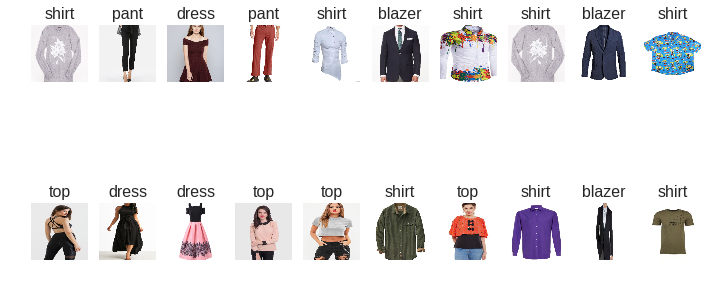

In [44]:
test_imgs, test_labels = next(valid_generator)
plots(test_imgs*255, rows=2, titles=[dict_class[np.argmax(l)] for l in test_labels  ])

In [45]:
train_generator.class_indices ###i.e. index 0 corresponds to sushi and ..

{'blazer': 4, 'dress': 3, 'pant': 1, 'shirt': 0, 'top': 2}

In [48]:
new_model.predict_generator(valid_generator, steps=2,verbose=0) ##steps is no. of batches

array([[7.48314429e-04, 6.95878640e-04, 1.28628435e-05, 5.25508949e-05,
        9.98490334e-01],
       [3.93481590e-02, 4.14759759e-03, 1.38451038e-02, 7.86270022e-01,
        1.56389117e-01],
       [9.93020952e-01, 1.03764819e-06, 2.55248797e-05, 6.94149965e-03,
        1.09645125e-05],
       [9.92973924e-01, 2.04526819e-04, 3.55607554e-05, 5.68622840e-04,
        6.21730369e-03],
       [1.06260115e-02, 9.80155647e-01, 4.06178879e-05, 4.62659227e-04,
        8.71513970e-03],
       [9.97431934e-01, 7.15826718e-06, 2.35527386e-05, 1.18884502e-03,
        1.34850037e-03],
       [8.23865586e-04, 4.96122763e-02, 1.15964049e-03, 9.20283616e-01,
        2.81205550e-02],
       [3.78401242e-02, 2.61023510e-02, 5.39815247e-01, 2.59586573e-01,
        1.36655718e-01],
       [6.50134027e-01, 1.34421304e-01, 2.84718955e-03, 1.17029818e-02,
        2.00894549e-01],
       [4.18342650e-03, 2.17666646e-04, 2.27666516e-02, 9.53743517e-01,
        1.90887619e-02],
       [4.72443104e-02, 2.1200

In [0]:
test_labels ## [0,1] is for ramen  

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

### Testing on new single image

In [0]:
from keras.models import load_model

In [0]:
new_model = load_model('./models/cloth.h5')

In [0]:
new_model.summary()

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


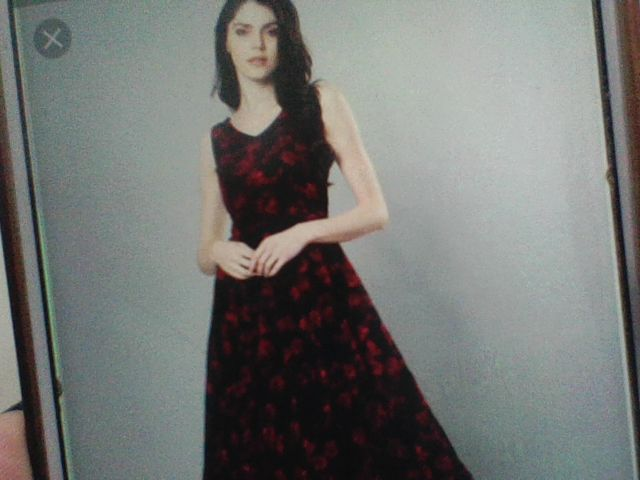

In [61]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [53]:
!find photo.jpg

photo.jpg


In [0]:
from keras.preprocessing.image import img_to_array
from PIL import Image

In [0]:
def preprocess_image(image, target_size):
    if image.mode != "RGB":
        image = image.convert("RGB")
    image = image.resize(target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

    return image

In [0]:
img = Image.open('./photo.jpg')


In [0]:
processed_image = preprocess_image(img, target_size=(224, 224))
prediction = new_model.predict(processed_image).tolist()

In [58]:
prediction

[[0.01124010793864727,
  4.26469541501189e-17,
  5.476671205428829e-08,
  0.035799868404865265,
  0.9529599547386169]]

In [59]:
valid_generator.class_indices ###i.e. index 0 corresponds to sushi and ..

{'blazer': 4, 'dress': 3, 'pant': 1, 'shirt': 0, 'top': 2}

predicted category : dress


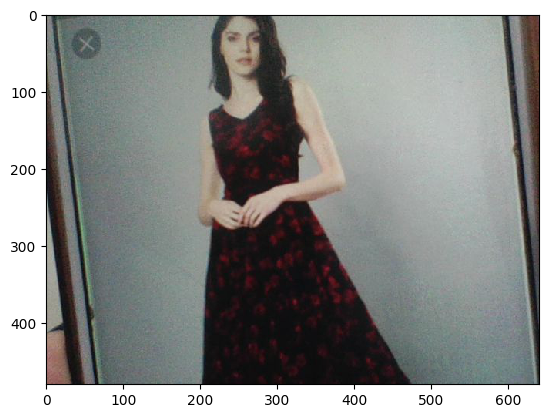

In [71]:
plt.style.use('default')
plt.imshow(img)
print('predicted category :', dict_class[np.argmax(prediction[0])])